## Свойства и объекты
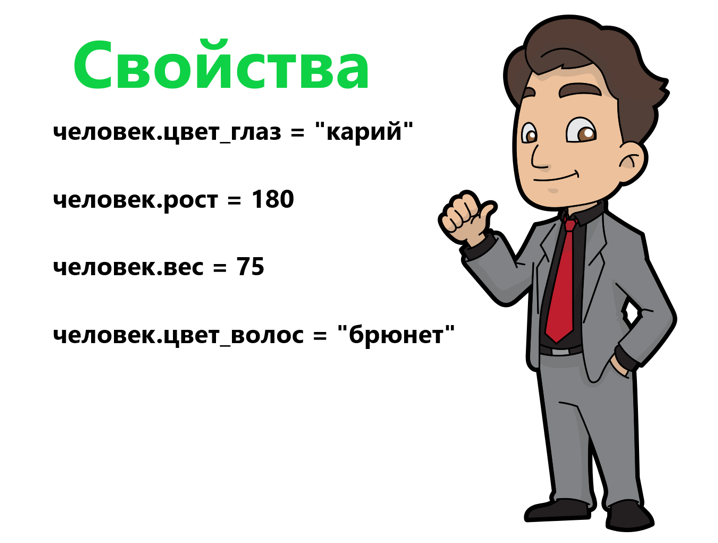
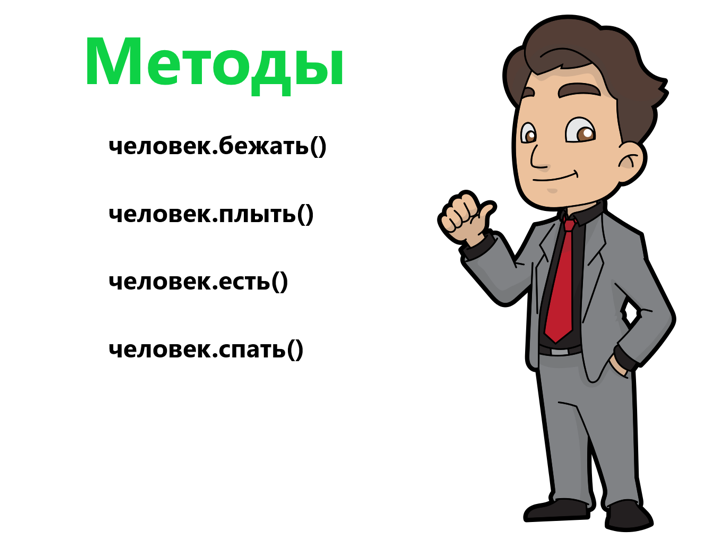

In [23]:
import math

## Принципы ООП
1) наследование Этот принцип базируется на том, что новый класс описывается на основе уже существующего (родительского), то есть не только перенимает все свойства родительского класса, но ещё и получает новые.
2) Абстракция означает выделение главных, наиболее значимых характеристик предмета и, наоборот, отбрасывание второстепенных, незначительных
3) инкапсуляция - Это свойство системы, позволяющее объединить данные и методы, работающие с ними, в классе и скрыть детали реализации от пользователя. Инкапсуляция также означает ограничение доступа к данным и возможностям их изменения.
4) Полиморфизм - Это свойство системы, позволяющее иметь множество реализаций одного интерфейса. 

## 3. Объекты и классы
Некоторые данные и действия над ними могут объединяться вместе в единый объект. В Python всё по сути является объектом. Объект числа хранит своё значение — данные, мы можем вызвать его методы, совершать действия. 

In [1]:
number = 2.5   
# Вызовем метод is_integer. Он скажет нам, является ли number целым числом  
print(number.is_integer())  
  
# Давайте попробуем представить number как обыкновенную дробь  
print(number.as_integer_ratio())  

False
(5, 2)


У всех встроенных объектов есть свой класс. В примере для числа 2.5 мы видим класс действительных чисел (float), для списка — класс списка (list). Класс — это некая заготовка или чертёж, которая описывает общую структуру, свойства и действия для объектов.

In [2]:
number = 2.5  
print(number.__class__)  
# => <class 'float'>  
  
people = ["Vasiliy", "Stanislav", "Alexandra", "Vasiliy"]  
print(people.__class__)  
# => <class 'list'> 

<class 'float'>
<class 'list'>


In [3]:
#классы можно создавать следующим образом: 

In [4]:
class SalesReport():  
    pass  

Мы написали свой первый класс — давайте создадим по нему объект. Вызываем класс и получаем новый объект аналогично тому, как вызывается функция. Получаем результат.

In [5]:
class SalesReport():  
    pass  
  
# создаём объект по классу  
report = SalesReport()  
  
# мы можем создавать множество объектов по одному классу  
report_2 = SalesReport()  
  
# Это будут разные объекты.   
print(report == report_2)  

False


## 4. Атрибуты и методы

In [6]:
 # По-прежнему пока создаём пустой класс  
class SalesReport():  
    pass  
  
# Создаём первый отчёт по продажам   
report = SalesReport()  
  
# Мы добавим новый атрибут объекту.  
# Для этого через точку напишем имя атрибута и дальше как с обычной переменной  
report.amount = 10  
  
# То же самое делаем для второго отчёта.  
report_2 = SalesReport()  
report_2.amount = 20  
  
# Создадим вспомогательную функцию, она будет печатать общую сумму из отчёта  
def print_report(report):  
    print("Total amount:", report.amount)  
      
print_report(report) 
print_report(report_2)

Total amount: 10
Total amount: 20


Для разных отчётов вывелись разные значения, хотя объекты создавались из одного класса. Функция print_report делает операцию над отчётом. Так как классы увязывают данные и действия над ними, положим print_report внутрь класса.

In [7]:
class SalesReport():  
    # Наш новый метод внутри класса.  
    # Мы определяем его похожим образом с обычными функциями,  
    # но только помещаем внутрь класса и первым аргументом передаём self  
    def print_report(self):  
        print("Total amount:", self.amount)  
          
          
# Дальше мы применяем report так же, как и в примере выше   
report = SalesReport()  
report.amount = 10  
  
report_2 = SalesReport()  
report_2.amount = 20  
  
# Используем наши новые методы  
report.print_report() 
report_2.print_report()

Total amount: 10
Total amount: 20


In [8]:
class SalesReport():  
    # Позволим добавлять много разных сделок   
    def add_deal(self, amount):   
        # На первой сделке создадим список для хранения всех сделок   
        if not hasattr(self, 'deals'):  
            self.deals = []  
        # Добавим текущую сделку  
        self.deals.append(amount)  
          
    # Посчитаем сумму всех сделок      
    def total_amount(self):  
        return sum(self.deals)  
      
    def print_report(self):  
        print("Total sales:", self.total_amount())  
          
# Используем наши новые возможности  
# Добавим две сделки и распечатаем отчёт  
report = SalesReport()  
report.add_deal(10_000)  
report.add_deal(30_000)  
report.print_report()

Total sales: 40000


In [9]:
class DepartmentReport():  
    # Позволим добавлять много разных сделок   
    def add_revenue(self, revenues):   
        # На первой сделке создадим список для хранения всех сделок   
        if not hasattr(self, 'revenues'):  
            self.revenues = []  
        # Добавим текущую сделку  
        self.revenues.append(revenues)  
          
    # Посчитаем сумму всех сделок      
    def average_revenue(self):  
        return sum(self.revenues) / len(self.revenues)

Атрибут deals, определённый в одном методе, становится доступен сразу во всех методах класса. Через self становятся доступны и остальные методы, например print_report использует метод total_amount. Это позволяет компактно упаковывать логику внутри класса: внешнее использование становится гораздо лаконичнее.

## Метод _INIT_

Мы определили несколько методов в классе SalesReport. С ним есть пара проблем. 

Если мы вызовем total_amount до add_deal, то список сделок ещё не будет создан, и мы получим ошибку. Также проверка на наличие списка в методе add_deal не кажется оптимальным решением, потому что создать список нужно один раз, а проверять его наличие мы вынуждены на каждой сделке.

In [10]:
class SalesReport():  
    def add_deal(self, amount):   
        if not hasattr(self, 'deals'):  
            self.deals = []  
        self.deals.append(amount)  
          
    def total_amount(self):  
        return sum(self.deals)  
      
    def print_report(self):  
        print("Total sales:", self.total_amount())  
          
report = SalesReport()  
report.total_amount() 

AttributeError: 'SalesReport' object has no attribute 'deals'

Обе проблемы решились бы, если задавать атрибутам исходное значение. Для этого у классов есть метод инициализации __init__. Если мы определим метод с таким именем, код в нём вызовется при создании объекта.

In [11]:
class SalesReport():  
    def __init__(self):  
        self.deals = []  
          
    def add_deal(self, amount):   
        self.deals.append(amount)  
          
    def total_amount(self):  
        return sum(self.deals)  
      
    def print_report(self):  
        print("Total sales:", self.total_amount())  
   
report = SalesReport()  
print(report.deals)   
report.total_amount() 

[]


0

__init__ — это технический метод, поэтому его имя начинается и заканчивается двумя подчёркиваниями. Он получает первым аргументом сам объект, в нём могут выполняться любые операции. Оставшиеся аргументы он получает из вызова при создании: если мы напишем report = SalesReport("Info", 20), то вторым и третьим аргументом в __init__ передадутся "Info" и 20.

In [12]:
class SalesReport():  
    # Будем принимать в __init__ ещё и имя менеджера  
    def __init__(self, manager_name):  
        self.deals = []  
        self.manager_name = manager_name  
          
    def add_deal(self, amount):   
        self.deals.append(amount)  
          
    def total_amount(self):  
        return sum(self.deals)  
      
    def print_report(self):  
        # И добавлять это имя в отчёт  
        print("Manager:", self.manager_name)  
        print("Total sales:", self.total_amount())  
          
   
report = SalesReport("Ivan Taranov")  
report.add_deal(10_000)  
report.add_deal(30_000)  
report.print_report()  

Manager: Ivan Taranov
Total sales: 40000


In [13]:
class DepartmentReport():
    def __init__(self, company_name):
        self.revenues=[]
        self.company=company_name

    def add_revenue(self, amount):
        self.revenues.append(amount)

    def average_revenue(self):
        average=int(round(sum(self.revenues)/len(self.revenues),0))
        return 'Average department revenue for {}: {}'.format(self.company,average)


## краткое резюме
* атрибут объекта — это просто его переменная;
* метод объекта — это его функция;
* метод объекта автоматически получает первым аргументом сам объект под именем self;
* класс описывает объект через его атрибуты и методы;
* мы можем создавать множество экземпляров одного класса, и значения их атрибутов независимы друг от друга;
* если определить метод __init__, то он будет выполняться при создании объекта;
* всё это позволяет компактно увязывать данные и логику внутри объекта.

Допустим, теперь мы хотим получать средний размер сделки и список клиентов, из которого исключены повторения (в случае, если компания заключала несколько сделок с одним и тем же клиентом).

In [14]:
class SalesReport():  
    def __init__(self, employee_name):  
        self.deals = []  
        self.employee_name = employee_name  
      
    def add_deal(self, company, amount):   
        self.deals.append({'company': company, 'amount': amount})  
          
    def total_amount(self):  
        return sum([deal['amount'] for deal in self.deals])  
      
    def average_deal(self):  
        return self.total_amount()/len(self.deals)  
      
    def all_companies(self):  
        return list(set([deal['company'] for deal in self.deals]))  
      
    def print_report(self):  
        print("Employee: ", self.employee_name)  
        print("Total sales:", self.total_amount())  
        print("Average sales:", self.average_deal())  
        print("Companies:", self.all_companies())  
      
      
report = SalesReport("Ivan Semenov")  
  
report.add_deal("PepsiCo", 120_000)  
report.add_deal("SkyEng", 250_000)  
report.add_deal("PepsiCo", 20_000)  
  
report.print_report()  

Employee:  Ivan Semenov
Total sales: 390000
Average sales: 130000.0
Companies: ['SkyEng', 'PepsiCo']


## Отслеживание состояния

In [17]:
class Client():  
    # Базовые данные  
    def __init__(self, email, order_num, registration_year):  
        self.email = email  
        self.order_num = order_num  
        self.registration_year = registration_year  
        self.discount = 0  
          
    # Оформление заказа  
    def make_order(self, price):  
        self.update_discount()  
        self.order_num += 1  
        # Здесь было бы оформление заказа, но мы просто выведем его цену  
        discounted_price = price * (1 - self.discount)   
        print(f"Order price for {self.email} is {discounted_price}")  
              
    # Назначение скидки  
    def update_discount(self):   
        if self.registration_year < 2018 and self.order_num >= 5:  
            self.discount = 0.1

            # Применение  
          
# Сделаем подобие базы  
client_db = [   
    Client("max@gmail.com", 2, 2019),  
    Client("lova@yandex.ru", 10, 2015),  
    Client("german@sberbank.ru", 4, 2017)  
]  

#Сгенерируем заказы  
client_db[0].make_order(100)  
client_db[1].make_order(200)
client_db[2].make_order(500)
client_db[2].make_order(500)

Order price for max@gmail.com is 100
Order price for lova@yandex.ru is 180.0
Order price for german@sberbank.ru is 500
Order price for german@sberbank.ru is 450.0


#### Задание 5.1
Мы разрабатываем приложение, которое подразумевает функционал авторизации пользователя, а также управление его балансом на некотором виртуальном счете.

Определите класс для пользователей User.

У него должны быть:

1) атрибуты email, password и balance, которые устанавливаются при инициализации в методе __init__();

2)  метод login(), который реализует проверку почты и пароля. Метод должен принимать в качестве аргументов емайл (email) и пароль (password). Если они совпадают с атрибутами объекта, он возвращает True, а иначе — False;

3)  метод update_balance(), который должен принимать в качестве аргумента amount некоторое число и изменять текущий баланс счёта (атрибут balance) на величину amount.

In [19]:
class User():
    #шаг 1
    def __init__(self, email, password, balance):
        self.email = email
        self.password = password
        self.balance = balance
    #шаг 2
    def login(self, email, password):
        if self.email == email and self.password == password:
            return True
        else: return False
    #шаг 3
    def update_balance(self, amount):
        self.balance = self.balance + amount
        return self.balance
    
user = User("gosha@roskino.org", "qwerty", 20_000)
print(user.login("gosha@roskino.org", "qwerty123"))
# False
print(user.login("gosha@roskino.org", "qwerty"))
# True
user.update_balance(200)
user.update_balance(-500)
print(user.balance)
# 19700


False
True
19700


## Комбинация операций

In [21]:
import statistics  
  
class DataFrame():  
    def __init__(self, column, fill_value=0):  
        # Инициализируем атрибуты  
        self.column = column  
        self.fill_value = fill_value  
        # Заполним пропуски  
        self.fill_missed()  
        # Конвертируем все элементы в числа  
        self.to_float()  
          
    def fill_missed(self):  
        for i, value in enumerate(self.column):  
            if value is None or value == '':  
                self.column[i] = self.fill_value  
                  
    def to_float(self):  
        self.column = [float(value) for value in self.column]  
      
    def median(self):  
        return statistics.median(self.column)  
      
    def mean(self):  
        return statistics.mean(self.column)  
      
    def deviation(self):  
        return statistics.stdev(self.column)  
      
  
      
# Воспользуемся классом  
df = DataFrame(["1", 17, 4, None, 8])
print(df.column)
print(df.deviation())
print(df.median())

[1.0, 17.0, 4.0, 0.0, 8.0]
6.892024376045111
4.0


Мы получили очень лаконичный интерфейс для использования класса. В __init__ мы использовали значение по умолчанию для fill_value, а методы позволяют нам определять необязательные параметры.

### Задание 5,2
Определите класс IntDataFrame, который в момент инициализации объектов принимает список неотрицательных чисел и приводит к целым значениям все числа в этом списке, отрезая дробную часть с помощью встроенной функции int().

Результирующий список должен быть сохранен в виде атрибута с именем column.

Также класс должен содержать следующие методы:

* count(), который возвращает количество ненулевых элементов в списке column;

* unique(), который возвращает число уникальных элементов в списке в списке column.

In [35]:
class IntDataFrame():
    def __init__(self, column):
        self.column = list(map(lambda x: int(x), column))

    def count(self):
        return len(list(filter(lambda x: x!=0, self.column)))

    def unique(self):
        return len(set(self.column))


## Класс-обёртка
Классы можно использовать тогда, когда у вас есть процесс, который требует сложной конфигурации, повторяющейся из раза в раз. Можно написать класс-обёртку, который сведёт этот процесс к одному-двум методам.

Представим, вы делаете обработку данных и в конце каждого дня сохраняете результат в архив. Вы хотите, чтобы данные каждого дня лежали в отдельном файле для этого дня, при этом можно было бы получить данные за произвольный день. 

Перед запуском кода создайте папку с названием archive там же, где находится ноутбук: 

In [37]:
import pickle  
from datetime import datetime  
from os import path  
  
class Dumper():  
    def __init__(self, archive_dir="archive/"):  
        self.archive_dir = archive_dir  
          
    def dump(self, data):  
        # Библиотека pickle позволяет доставать и класть объекты в файл  
        with open(self.get_file_name(), 'wb') as file:  
            pickle.dump(data, file)  
              
    def load_for_day(self, day):  
        file_name = path.join(self.archive_dir, day + ".pkl")   
        with open(file_name, 'rb') as file:  
            sets = pickle.load(file)  
        return sets  
          
    # возвращает корректное имя для файла   
    def get_file_name(self):   
        today = datetime.now().strftime("%y-%m-%d")   
        return path.join(self.archive_dir, today + ".pkl")
    # Пример использования  
  
data = {  
    'perfomance': [10, 20, 10],  
    'clients': {"Romashka": 10, "Vector": 34}  
}  
dumper = Dumper()
dumper.dump(data)
file_name = datetime.now().strftime("%y-%m-%d")
restored_data = dumper.load_for_day(file_name)
print(restored_data)  

{'perfomance': [10, 20, 10], 'clients': {'Romashka': 10, 'Vector': 34}}


## Задача 5.3
Напишите класс сборщика технических сообщений OwnLogger.

У него должен быть

* атрибут logs, содержащий {"info": None, "warning": None, "error": None, "all": None}.
* метод log(message, level), который записывает сообщения. Здесь сообщение message может быть любым, а level — один из "info", "warning", "error".
* метод show_last(level), где level может быть "info", "warning", "error", "all".
Для "all" он просто возвращает последнее добавленное сообщение, а для остальных — последнее поступившее сообщение соответствующего уровня. При этом по умолчанию значение именно "all".

Если подходящего сообщения нет, возвращает None.

In [ ]:
class OwnLogger():
    def __init__(self):
        self.logs = {"info": None, "warning": None, "error": None, "all": None}
    def log(self, message, level):
        self.logs[level] = message
        self.logs['all'] = message
    def show_last(self, level='all'):
        return self.logs[level]


## Импорт и организация кода
Классы, как и библиотечные функции, можно импортировать в другие программы. Для этого нужно положить класс в отдельный файл в корне проекта и использовать ключевое слово import. 

Например, если мы положим Dumper в файл dumper.py в корне проекта, то его можно импортировать командой:

 from dumper import Dumper  
Пишем from <имя файла без .py> import <имя класса>. Имя файла должно начинаться с буквы и не совпадать с именами библиотечных модулей. Если файлов с классами много, их можно складывать в папки, предварительно положив туда пустой файл __init__.py — это требование Python.

Сгруппируем классы из примеров в папке helpers. Структура файлов:

In [ ]:
from helpers.dumper import Dumper  
from helpers.data_frame import DataFrame  
from helpers.client import Client  

# применение ООп для работы с файлами

В операционных системах UNIX разделительным знаком при записи пути является «/» (слеш), в Windows — «\» (обратный слеш). Эти знаки служат для разделения названия каталогов, составляющих путь к файлу. Все вы видели, например, такой путь на ОС Windows: C:\Program Files. Это и есть путь до папки Program Files.

Существует два типа пути:

* абсолютный;
*  относительный.
Абсолютный путь всегда считается от «корня», той папки, откуда потом «вырастают» все остальные папки. Для Windows это диск С:, D: и т. д., для Unix это “/”. Абсолютный путь всегда уникальный.

Абсолютный путь — это путь, который указывает на одно и то же место в файловой системе, вне зависимости от текущего рабочего каталога или других обстоятельств. Его ещё называют полным.

Относительный путь — это путь по отношению к текущему рабочему каталогу пользователя.

Чтобы поработать с путями, есть модуль os. Функция os.chdir() позволяет нам изменить директорию, которую мы в данный момент используем. Если вам нужно знать, какой путь вы в данный момент используете, для этого нужно вызвать os.getcwd().

## Работа с файлами
Python «из коробки» располагает достаточно широким набором инструментов для работы с файлами. Для того чтобы начать работать с файлом, надо его открыть с помощью команды специальной функции open

f = open('path/to/file', 'filemode', encoding='utf8')

Результатом этой операции будет файл, в котором указатель текущей позиции поставлен на начало или конец файла.

* path/to/file — путь к файлу может быть относительным или абсолютным. Можно указывать в Unix-стиле (path/to/file) или в Windows-стиле (path\to\file).
* filemode — режим, в котором файл нужно открывать.

Записывается в виде строки, может принимать следующие значения:
r — открыть на чтение (по умолчанию);
w — перезаписать и открыть на запись (если файла нет, то он создастся);
x — создать и открыть на запись (если уже есть — исключение);
a — открыть на дозапись (указатель будет поставлен в конец);
t — открыть в текстовом виде (по умолчанию);
b — открыть в бинарном виде.
* encoding — указание, в какой кодировке файл записан (utf8, cp1251 и т. д.) По умолчанию стоит utf-8. При этом можно записывать кодировку как через дефис, так и без: utf-8 или utf8.

## Исключения

Исключения — это такие ошибки, которые возникают не во время компиляции программы, а в процессе её исполнения, в случаях, если что-то идёт не так.

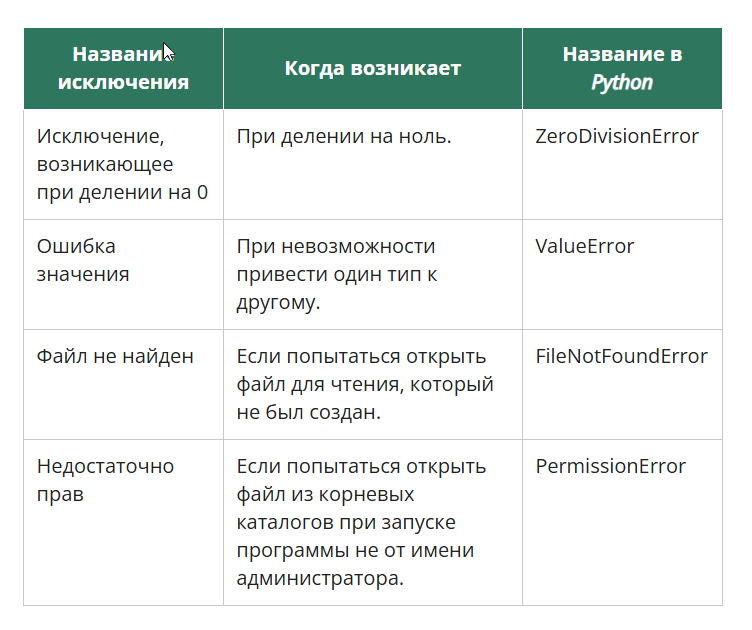

Разбёрем на примере

In [ ]:
print("Перед исключением")
# теперь пользователь сам вводит числа для деления
a = int(input("a: "))
b = int(input("b: "))
c = a / b  # здесь может возникнуть исключение деления на ноль
print(c)  # печатаем c = a / b если всё хорошо
print("После исключения")

В этом случае если пользователь введёт ноль, то код не отработает и будет ошибка

In [3]:
try:  # Добавляем конструкцию try-except для отлова нашей ошибки
    print("Перед исключением")
    # теперь пользователь сам вводит числа для деления
    a = int(input("a: "))
    b = int(input("b: "))
    c = a / b  # здесь может возникнуть исключение деления на ноль
    print(c)  # печатаем c = a / b если всё хорошо
except ZeroDivisionError as e: # Добавляем тип именно той ошибки, которую хотим отловить.     
    print(e)  # Выводим информацию об ошибке
    print("После исключения")
 
print("После После исключения")

Перед исключением
division by zero
После исключения
После После исключения


try:
    *ваш код*
except Ошибка:
    *Код отлова*
else:
    *Код, который выполнится если всё хорошо прошло в блоке try*
finally:
    *Код, который выполнится по любому*

try:
    age = int(input("Сколько тебе лет?"))

    if age > 100 or age <= 0:
        raise ValueError("Тебе не может быть столько лет")

    # Возраст выводится только если пользователь ввёл правильный возраст.
    print(f"Тебе {age} лет!")
except ValueError:
    print("Неправильный возраст")